# Assign description sentiment scores

Followed instructions from http://www.informit.com/articles/article.aspx?p=2931567&seqNum=6 and 
<br>
Google's tutorial https://codelabs.developers.google.com/codelabs/cloud-natural-language-python3/index.html?index=..%2F..index#3
https://cloud.google.com/docs/authentication/getting-started#auth-cloud-implicit-python

In [ ]:
import os
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
desc_train_df = pd.read_csv('./SE_rents2018_train.csv')
desc_train_df.shape

In [ ]:
#check for nulls
desc_train_df.isnull().sum()

In [ ]:
#replace NaN values with "No description"
desc_train_df["description"].fillna("No Description", inplace = True) 
desc_train_df.isnull().sum()

In [ ]:
#install google's models 
#pip3 install --upgrade google-cloud-language

In [ ]:
# run in terminal: export GOOGLE_APPLICATION_CREDENTIALS="/Users/q/Downloads/jupyter/sentiment/new project-77ef3c558b1a.json"
#then: jupyter notebook

def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

In [ ]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

In [90]:
def analyze_text_sentiment(text):
    client = language.LanguageServiceClient()
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    response = client.analyze_sentiment(document=document)

    sentiment = response.document_sentiment
    results = [sentiment.score, sentiment.magnitude]
    return results
        
#desc_train_df['sentiment_score'] = 

In [91]:
#test sentiment function
text = "MAGNIFICENT GUT RENOVATED 4 BEDROOM 3 BATHROOM WITH WASHER & DRYER.\r\n\r\nBE THE FIRST TO LIVE IN THIS KING SIZE APARTMENT WITH KING SIZE BEDROOMS AND GIGANTIC LIVING SPACE!\r\n\r\nNO FEE – FIRST AND SECURITY TO MOVE IN.\r\n\r\nGUT RENOVATED ONE OF A KIND NO FEE\r\n\r\nLUXURY LUXURY LUXURY\r\n\r\n- Very nice NEW kitchen and bathrooms!\r\n- Shined floors!\r\n- Massive bedrooms!!\r\n- Awesome, spacious kitchen and living room!\r\n\r\nClean, quiet and well looked after building\r\n\r\nWASHER DRYER IN UNIT!!!\r\n\r\n- Heat and hot water included! \r\n- Big windows\r\n- Sunny\r\n- Good closet space 7 CLOSETS \r\n- Live in Super, he's really nice and responsive\r\n\r\n*Note: Advertised rent reflects net effective rent with 1 month free."
#res = analyze_text_sentiment(text)
#print(res[0])
analyze_text_sentiment(text)#score

[0.4000000059604645, 8.399999618530273]

In [ ]:
#assign descriptions sentiment values / add new columns

In [ ]:
#scores = []
#magnitudes =[]
#for ind in range(0,2000):
    #val = desc_train_df.loc[desc_train_df.index[ind], 'description']
    #scores.append(analyze_text_sentiment(val)[0])
    #magnitudes.append(analyze_text_sentiment(val)[1])


In [51]:
print(len(magnitudes))

442


In [52]:
for ind in range(442,12000):
    val = desc_train_df.loc[desc_train_df.index[ind], 'description']
    scores.append(analyze_text_sentiment(val)[0])
    magnitudes.append(analyze_text_sentiment(val)[1])

ERROR:concurrent.futures:exception calling callback for <Future at 0x1302f8f10 state=finished raised TransportError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/urllib3/connection.py", line 157, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "/usr/local/lib/python3.7/site-packages/urllib3/util/connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/socket.py", line 748, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/urllib3/connectionpool.py", line 672, in urlopen
    chunked=chunked,
  File "/usr/l

RetryError: Deadline of 600.0s exceeded while calling functools.partial(<function _wrap_unary_errors.<locals>.error_remapped_callable at 0x1302fc680>, document {
  type: PLAIN_TEXT
  content: "This converted unit is great for a family or a share, Please feel free to stop by any day of the week to view from 10a.m.-7p.m."
}
, metadata=[('x-goog-api-client', 'gl-python/3.7.5 grpc/1.25.0 gax/1.14.3 gapic/1.3.0')]), last exception: 503 Deadline Exceeded

In [54]:
print(len(scores))

549


In [55]:
for ind in range(550,12000):
    val = desc_train_df.loc[desc_train_df.index[ind], 'description']
    scores.append(analyze_text_sentiment(val)[0])
    magnitudes.append(analyze_text_sentiment(val)[1])

ERROR:concurrent.futures:exception calling callback for <Future at 0x1306d5a90 state=finished raised TransportError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/urllib3/connection.py", line 157, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "/usr/local/lib/python3.7/site-packages/urllib3/util/connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/socket.py", line 748, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/urllib3/connectionpool.py", line 672, in urlopen
    chunked=chunked,
  File "/usr/l

RetryError: Deadline of 600.0s exceeded while calling functools.partial(<function _wrap_unary_errors.<locals>.error_remapped_callable at 0x1306d2440>, document {
  type: PLAIN_TEXT
  content: "This massive one bedroom is located right by Continental Avenue and Austin street. The e,f.m.r train line is in a short walking distance. The unit is on the 2nd floor of a pre-war elevator laundry building. The unit has hardwood floors. Recently renovated bathroom and kitchen. Tons of space! The unit has good size closets! Management is offering 2 year leases!"
}
, metadata=[('x-goog-api-client', 'gl-python/3.7.5 grpc/1.25.0 gax/1.14.3 gapic/1.3.0')]), last exception: 503 Deadline Exceeded

In [56]:
print(len(scores))

603


In [57]:
for ind in range(604,700):
    val = desc_train_df.loc[desc_train_df.index[ind], 'description']
    scores.append(analyze_text_sentiment(val)[0])
    magnitudes.append(analyze_text_sentiment(val)[1])

ERROR:concurrent.futures:exception calling callback for <Future at 0x130877b90 state=finished raised TransportError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/urllib3/connection.py", line 157, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "/usr/local/lib/python3.7/site-packages/urllib3/util/connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/socket.py", line 748, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/urllib3/connectionpool.py", line 672, in urlopen
    chunked=chunked,
  File "/usr/l

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-57-68b34ed18e48>", line 4, in <module>
    magnitudes.append(analyze_text_sentiment(val)[1])
  File "<ipython-input-30-ddbb366815db>", line 7, in analyze_text_sentiment
    response = client.analyze_sentiment(document=document)
  File "/usr/local/lib/python3.7/site-packages/google/cloud/language_v1/gapic/language_service_client.py", line 247, in analyze_sentiment
    request, retry=retry, timeout=timeout, metadata=metadata
  File "/usr/local/lib/python3.7/site-packages/google/api_core/gapic_v1/method.py", line 143, in __call__
    return wrapped_func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/google/api_core/retry.py", line 277, in retry_wrapped_func
    on_error=on_error,
  File "/usr/local/lib/python3.7/site-packages/google/api_core/retry.py", line 1

KeyboardInterrupt: 

In [58]:
print(len(scores))

630
The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.

In [60]:
for ind in range(631,700):
    val = desc_train_df.loc[desc_train_df.index[ind], 'description']
    scores.append(analyze_text_sentiment(val)[0])
    magnitudes.append(analyze_text_sentiment(val)[1])

ERROR:concurrent.futures:exception calling callback for <Future at 0x13092b150 state=finished raised TransportError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/urllib3/connection.py", line 157, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "/usr/local/lib/python3.7/site-packages/urllib3/util/connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/socket.py", line 748, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/urllib3/connectionpool.py", line 672, in urlopen
    chunked=chunked,
  File "/usr/l

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-60-63f112101b0a>", line 3, in <module>
    scores.append(analyze_text_sentiment(val)[0])
  File "<ipython-input-30-ddbb366815db>", line 7, in analyze_text_sentiment
    response = client.analyze_sentiment(document=document)
  File "/usr/local/lib/python3.7/site-packages/google/cloud/language_v1/gapic/language_service_client.py", line 247, in analyze_sentiment
    request, retry=retry, timeout=timeout, metadata=metadata
  File "/usr/local/lib/python3.7/site-packages/google/api_core/gapic_v1/method.py", line 143, in __call__
    return wrapped_func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/google/api_core/retry.py", line 277, in retry_wrapped_func
    on_error=on_error,
  File "/usr/local/lib/python3.7/site-packages/google/api_core/retry.py", line 182, 

KeyboardInterrupt: 

In [61]:
print(len(scores))

642


In [62]:
for ind in range(643,730):
    val = desc_train_df.loc[desc_train_df.index[ind], 'description']
    scores.append(analyze_text_sentiment(val)[0])
    magnitudes.append(analyze_text_sentiment(val)[1])

ERROR:concurrent.futures:exception calling callback for <Future at 0x130976c90 state=finished raised TransportError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/urllib3/connection.py", line 157, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "/usr/local/lib/python3.7/site-packages/urllib3/util/connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/socket.py", line 748, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/urllib3/connectionpool.py", line 672, in urlopen
    chunked=chunked,
  File "/usr/l

RetryError: Deadline of 600.0s exceeded while calling functools.partial(<function _wrap_unary_errors.<locals>.error_remapped_callable at 0x13096eb00>, document {
  type: PLAIN_TEXT
  content: "On one of the nicest blocks in Ridgewood your find this serene garden duplex.  We took special care to make this a one of a kind apartment:\r\n\r\nhand scraped teak floors\r\nhand refinished original brick walls\r\nantique chinese doors\r\ncustom steel work\r\nprofessional series kitchen with five burner range and convection oven\r\nfull size stacked washer dryer\r\n\r\n\r\ntake a look at the photos and come see this wonderful place\r\n\r\ncats and well mannered dogs on approval"
}
, metadata=[('x-goog-api-client', 'gl-python/3.7.5 grpc/1.25.0 gax/1.14.3 gapic/1.3.0')]), last exception: 503 Deadline Exceeded

In [63]:
print(len(scores))

647


In [64]:
print(scores)

[0.4000000059604645, 0.5, 0.8999999761581421, 0.0, 0.30000001192092896, 0.5, 0.6000000238418579, 0.4000000059604645, 0.4000000059604645, 0.4000000059604645, 0.4000000059604645, 0.5, 0.5, 0.30000001192092896, 0.699999988079071, 0.20000000298023224, 0.5, 0.30000001192092896, 0.10000000149011612, 0.30000001192092896, 0.0, 0.5, 0.5, 0.20000000298023224, 0.30000001192092896, 0.5, 0.6000000238418579, 0.4000000059604645, 0.20000000298023224, 0.5, 0.30000001192092896, 0.699999988079071, -0.10000000149011612, 0.6000000238418579, 0.800000011920929, 0.4000000059604645, 0.30000001192092896, 0.699999988079071, 0.5, 0.20000000298023224, 0.5, 0.20000000298023224, 0.4000000059604645, 0.8999999761581421, 0.10000000149011612, 0.699999988079071, 0.10000000149011612, 0.0, 0.4000000059604645, 0.20000000298023224, 0.4000000059604645, 0.10000000149011612, 0.4000000059604645, 0.5, 0.6000000238418579, 0.4000000059604645, 0.5, 0.20000000298023224, 0.20000000298023224, 0.8999999761581421, 0.800000011920929, 0.60

In [66]:
small_df=desc_train_df.iloc[0:647]

In [67]:
small_df.shape

(647, 39)

In [72]:
small_df

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,...,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
0,7236931,#22A,551248,4,3.0,1300.0,2018-06-04 16:31:06,645 OCEAN AVENUE,Brooklyn,11226,...,0,0,3925,1,MAGNIFICENT GUT RENOVATED 4 BEDROOM 3 BATHROOM...,Flatbush,Brooklyn,22A,NaN,NaN
1,7331920,#406,3373,0,1.0,475.0,2018-07-03 20:11:43,93 WORTH STREET,New York,10013,...,0,0,3350,0,Want to live in the hottest neighborhood in to...,Tribeca,Manhattan,406,4.0,06
2,7139224,#18A,70747,3,3.0,1886.0,2018-05-02 16:10:27,305 EAST 51 STREET,New York,10022,...,1,0,11500,0,"High floor totally renovated 3 bedrooms, 3 bat...",Midtown East,Manhattan,18A,18.0,A
3,7364827,#23E,42076,1,1.0,827.0,2018-07-13 16:06:55,70 WEST 37TH STREET,New York,10018,...,0,0,3772,1,**SHORT TERM LEASES AVAILABLE**\n\n****Photogr...,Midtown South,Manhattan,23E,23.0,E
4,7242151,#3B,319156,3,1.0,1200.0,2018-06-05 16:35:40,43 MAC DONOUGH STREET,Brooklyn,11216,...,0,0,2595,1,This is a Huuge 3 bedroom apt. located in a pr...,Bedford-Stuyvesant,Brooklyn,3B,3.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,7220065,#3,411283,3,1.0,1100.0,2018-05-30 14:27:03,1230 BUSHWICK AVENUE,Brooklyn,11221,...,0,0,2500,1,3 flex 4 bedroom apartment Bushwick . apartmen...,Bushwick,Brooklyn,3,3.0,NaN
643,7248664,#20D,87670,0,1.0,458.0,2018-06-07 11:18:34,455 EAST 86 STREET,New York,10028,...,1,1,2350,0,High floor studio apartment in the full servic...,Upper East Side,Manhattan,20D,20.0,D
644,7421527,#2D,29839,1,1.0,550.0,2018-07-30 16:20:26,244 WEST 4 STREET,New York,10014,...,0,0,4000,1,Rarely available one bedroom in the heart of t...,West Village,Manhattan,2D,2.0,D
645,7358764,#6A,104656,1,1.0,669.0,2018-07-12 11:22:55,801 AMSTERDAM AVE,New York,10025,...,1,1,3895,1,Five gleaming glass towers rise above the humm...,Upper West Side,Manhattan,6A,6.0,A


In [71]:
small_df.addr_city.unique()

array(['Brooklyn', 'New York', 'Jackson Heights', 'Astoria', 'Woodside',
       'Sunnyside', 'Flushing', 'Bronx', 'Forest Hills', 'Middle Village',
       'Ridgewood', 'Elmhurst', 'Rego Park', 'Jamaica', 'Oakland Gardens',
       'Long Island City', 'Queens', 'Kew Gardens'], dtype=object)

In [77]:
bool(small_df.is_copy)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


True

In [78]:
#make it not copy of desc_train_df
small_df = small_df.copy()

In [80]:
bool(small_df.is_copy)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


False

In [81]:
small_df['sentiment_score'] = scores

In [82]:
small_df.shape

(647, 41)

In [85]:
small_df

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,...,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,sentiment_score,scores
0,7236931,#22A,551248,4,3.0,1300.0,2018-06-04 16:31:06,645 OCEAN AVENUE,Brooklyn,11226,...,3925,1,MAGNIFICENT GUT RENOVATED 4 BEDROOM 3 BATHROOM...,Flatbush,Brooklyn,22A,NaN,NaN,0.4,0.4
1,7331920,#406,3373,0,1.0,475.0,2018-07-03 20:11:43,93 WORTH STREET,New York,10013,...,3350,0,Want to live in the hottest neighborhood in to...,Tribeca,Manhattan,406,4.0,06,0.5,0.5
2,7139224,#18A,70747,3,3.0,1886.0,2018-05-02 16:10:27,305 EAST 51 STREET,New York,10022,...,11500,0,"High floor totally renovated 3 bedrooms, 3 bat...",Midtown East,Manhattan,18A,18.0,A,0.9,0.9
3,7364827,#23E,42076,1,1.0,827.0,2018-07-13 16:06:55,70 WEST 37TH STREET,New York,10018,...,3772,1,**SHORT TERM LEASES AVAILABLE**\n\n****Photogr...,Midtown South,Manhattan,23E,23.0,E,0.0,0.0
4,7242151,#3B,319156,3,1.0,1200.0,2018-06-05 16:35:40,43 MAC DONOUGH STREET,Brooklyn,11216,...,2595,1,This is a Huuge 3 bedroom apt. located in a pr...,Bedford-Stuyvesant,Brooklyn,3B,3.0,B,0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,7220065,#3,411283,3,1.0,1100.0,2018-05-30 14:27:03,1230 BUSHWICK AVENUE,Brooklyn,11221,...,2500,1,3 flex 4 bedroom apartment Bushwick . apartmen...,Bushwick,Brooklyn,3,3.0,NaN,0.8,0.8
643,7248664,#20D,87670,0,1.0,458.0,2018-06-07 11:18:34,455 EAST 86 STREET,New York,10028,...,2350,0,High floor studio apartment in the full servic...,Upper East Side,Manhattan,20D,20.0,D,0.7,0.7
644,7421527,#2D,29839,1,1.0,550.0,2018-07-30 16:20:26,244 WEST 4 STREET,New York,10014,...,4000,1,Rarely available one bedroom in the heart of t...,West Village,Manhattan,2D,2.0,D,0.5,0.5
645,7358764,#6A,104656,1,1.0,669.0,2018-07-12 11:22:55,801 AMSTERDAM AVE,New York,10025,...,3895,1,Five gleaming glass towers rise above the humm...,Upper West Side,Manhattan,6A,6.0,A,0.3,0.3


In [87]:
small_df['description'][0]

"MAGNIFICENT GUT RENOVATED 4 BEDROOM 3 BATHROOM WITH WASHER & DRYER.\r\n\r\nBE THE FIRST TO LIVE IN THIS KING SIZE APARTMENT WITH KING SIZE BEDROOMS AND GIGANTIC LIVING SPACE!\r\n\r\nNO FEE – FIRST AND SECURITY TO MOVE IN.\r\n\r\nGUT RENOVATED ONE OF A KIND NO FEE\r\n\r\nLUXURY LUXURY LUXURY\r\n\r\n- Very nice NEW kitchen and bathrooms!\r\n- Shined floors!\r\n- Massive bedrooms!!\r\n- Awesome, spacious kitchen and living room!\r\n\r\nClean, quiet and well looked after building\r\n\r\nWASHER DRYER IN UNIT!!!\r\n\r\n- Heat and hot water included! \r\n- Big windows\r\n- Sunny\r\n- Good closet space 7 CLOSETS \r\n- Live in Super, he's really nice and responsive\r\n\r\n*Note: Advertised rent reflects net effective rent with 1 month free."

In [89]:
small_df.to_csv('sentiment_scores.csv', header=False, index=False)

Text(0.5, 1.0, 'rent vs. sentiment score')

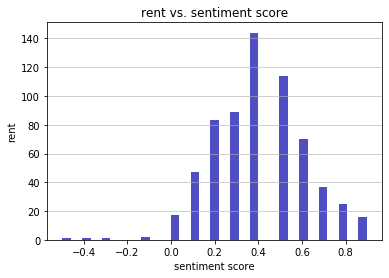

In [96]:
x= small_df['sentiment_score']
y= small_df['rent']
n, bins, patches = plt.hist(x, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('sentiment score')
plt.ylabel('rent')
plt.title('rent vs. sentiment score')

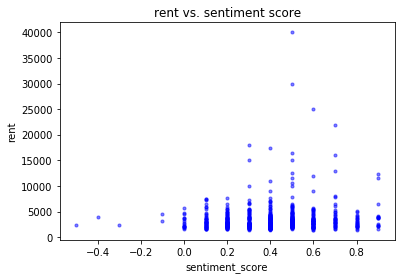

In [100]:
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, color='b', alpha=0.5)
plt.title('rent vs. sentiment score')
plt.xlabel('sentiment_score')
plt.ylabel('rent')
plt.show()

## Test this

In [124]:
for ind in small_df.index:
    if small_df.loc[small_df.index[ind], 'sentiment_score'] >=0.0:
        small_df.loc[small_df.index[ind], 'sentiment_score'] = 'positive'
    elif small_df.loc[small_df.index[ind], 'sentiment_score'] < 0.0:
        small_df.loc[small_df.index[ind], 'sentiment_score'] = 'negative'

In [125]:
small_df.head()

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,...,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,sentiment_score,scores
0,7236931,#22A,551248,4,3.0,1300.0,2018-06-04 16:31:06,645 OCEAN AVENUE,Brooklyn,11226,...,3925,1,MAGNIFICENT GUT RENOVATED 4 BEDROOM 3 BATHROOM...,Flatbush,Brooklyn,22A,NaN,NaN,positive,0.4
1,7331920,#406,3373,0,1.0,475.0,2018-07-03 20:11:43,93 WORTH STREET,New York,10013,...,3350,0,Want to live in the hottest neighborhood in to...,Tribeca,Manhattan,406,4.0,06,positive,0.5
2,7139224,#18A,70747,3,3.0,1886.0,2018-05-02 16:10:27,305 EAST 51 STREET,New York,10022,...,11500,0,"High floor totally renovated 3 bedrooms, 3 bat...",Midtown East,Manhattan,18A,18.0,A,positive,0.9
3,7364827,#23E,42076,1,1.0,827.0,2018-07-13 16:06:55,70 WEST 37TH STREET,New York,10018,...,3772,1,**SHORT TERM LEASES AVAILABLE**\n\n****Photogr...,Midtown South,Manhattan,23E,23.0,E,positive,0.0
4,7242151,#3B,319156,3,1.0,1200.0,2018-06-05 16:35:40,43 MAC DONOUGH STREET,Brooklyn,11216,...,2595,1,This is a Huuge 3 bedroom apt. located in a pr...,Bedford-Stuyvesant,Brooklyn,3B,3.0,B,positive,0.3


## Sentiment Analysis
Followed Data Camp Example: https://campus.datacamp.com/courses/natural-language-processing-fundamentals-in-python/building-a-fake-news-classifier?ex=1

## Part 1

In [129]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Print the head of df
print(small_df.head())

# Create a series to store the labels: y
y = small_df.sentiment_score

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(small_df['description'], y, test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'description' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'description' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

   rental_id addr_unit  building_id  bedrooms  bathrooms  size_sqft  \
0    7236931      #22A       551248         4        3.0     1300.0   
1    7331920      #406         3373         0        1.0      475.0   
2    7139224      #18A        70747         3        3.0     1886.0   
3    7364827      #23E        42076         1        1.0      827.0   
4    7242151       #3B       319156         3        1.0     1200.0   

            created_at            addr_street addr_city  addr_zip  ...   rent  \
0  2018-06-04 16:31:06       645 OCEAN AVENUE  Brooklyn     11226  ...   3925   
1  2018-07-03 20:11:43        93 WORTH STREET  New York     10013  ...   3350   
2  2018-05-02 16:10:27     305 EAST 51 STREET  New York     10022  ...  11500   
3  2018-07-13 16:06:55    70 WEST 37TH STREET  New York     10018  ...   3772   
4  2018-06-05 16:35:40  43 MAC DONOUGH STREET  Brooklyn     11216  ...   2595   

   no_fee                                        description  \
0       1  MAGNIFICENT

## Part 2

In [130]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


['00', '000', '00pm', '10', '100', '1000', '101', '102', '103rd', '1075']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Part 3

In [131]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

   00  000  00pm  10  100  1000  101  102  103rd  1075  ...  zabar  zagat  \
0   0    0     0   0    0     0    0    0      0     0  ...      0      0   
1   0    0     0   0    0     0    0    0      0     0  ...      0      0   
2   0    0     0   0    0     0    0    0      0     0  ...      0      0   
3   0    0     0   0    0     0    0    0      0     0  ...      0      0   
4   0    0     0   0    0     0    0    0      0     0  ...      0      0   

   zen  zero  zikos  zillow  zisimopoulos  zone  zoned  zuma  
0    0     0      0       0             0     0      0     0  
1    0     0      0       0             0     0      0     0  
2    0     0      0       0             0     0      0     0  
3    0     0      0       0             0     0      0     0  
4    0     0      0       0             0     0      0     0  

[5 rows x 3880 columns]


In [132]:
# Print the head of tfidf_df
print(tfidf_df.head())

    00  000  00pm   10  100  1000  101  102  103rd  1075  ...  zabar  zagat  \
0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0    0.0   
1  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0    0.0   
2  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0    0.0   
3  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0    0.0   
4  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0    0.0   

   zen  zero  zikos  zillow  zisimopoulos  zone  zoned  zuma  
0  0.0   0.0    0.0     0.0           0.0   0.0    0.0   0.0  
1  0.0   0.0    0.0     0.0           0.0   0.0    0.0   0.0  
2  0.0   0.0    0.0     0.0           0.0   0.0    0.0   0.0  
3  0.0   0.0    0.0     0.0           0.0   0.0    0.0   0.0  
4  0.0   0.0    0.0     0.0           0.0   0.0    0.0   0.0  

[5 rows x 3880 columns]


In [133]:
# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


In [134]:
# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

False


Training and testing model with countVectorizer

In [145]:
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

1.0


In [137]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['negative', 'positive'])
print(cm)

[[  1   0]
 [  0 213]]


## Part 4

In [139]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['negative','positive'])
print(cm)

0.9953271028037384
[[  0   1]
 [  0 213]]


## Part 5

In [141]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, .1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

Alpha:  0.0
Score:  1.0

Alpha:  0.1
Score:  0.9953271028037384

Alpha:  0.2
Score:  0.9953271028037384

Alpha:  0.30000000000000004
Score:  0.9953271028037384

Alpha:  0.4
Score:  0.9953271028037384

Alpha:  0.5
Score:  0.9953271028037384

Alpha:  0.6000000000000001
Score:  0.9953271028037384

Alpha:  0.7000000000000001
Score:  0.9953271028037384

Alpha:  0.8
Score:  0.9953271028037384

Alpha:  0.9
Score:  0.9953271028037384



/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


## Inspect Model

In [143]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

negative [(-8.831904858527356, 'particular'), (-8.831904858527356, 'tosh'), (-8.762093603824182, '195'), (-8.762093603824182, 'bedding'), (-8.762093603824182, 'bi'), (-8.762093603824182, 'mandatory'), (-8.762093603824182, 'nationwide'), (-8.762093603824182, 'pied'), (-8.762093603824182, 'policies'), (-8.762093603824182, 'sublets'), (-8.762093603824182, 'terr'), (-8.762093603824182, 'ware'), (-8.762093603824182, 'wraparound'), (-8.756844399470635, '94'), (-8.756844399470635, 'afford'), (-8.756844399470635, 'believes'), (-8.756844399470635, 'comprise'), (-8.756844399470635, 'environment'), (-8.756844399470635, 'exemplary'), (-8.756844399470635, 'firmly')]


In [144]:
# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])


positive [(-6.42379152302864, 'stainless'), (-6.408344250482907, 'floor'), (-6.375502002263406, 'rent'), (-6.371229090582154, 'spacious'), (-6.37066230650372, 'great'), (-6.361439434323479, 'hardwood'), (-6.345249391243782, 'appliances'), (-6.339452094573842, 'available'), (-6.324079465120228, 'park'), (-6.2923456712259, 'renovated'), (-6.264643041511235, 'floors'), (-6.258271911566339, 'living'), (-6.220964334480795, 'space'), (-6.0821709570622575, 'building'), (-6.060504968640567, 'kitchen'), (-6.052369842366735, 'new'), (-6.011976633661212, 'large'), (-5.97929858110537, 'room'), (-5.84792314854128, 'apartment'), (-5.827226952085299, 'bedroom')]


In [146]:
testing_df = desc_train_df

In [148]:
bool(testing_df.is_copy)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


False

In [156]:
testing_df.isnull().sum()

rental_id                    0
addr_unit                   91
building_id                  0
bedrooms                     0
bathrooms                    0
size_sqft                    0
created_at                   0
addr_street                  0
addr_city                    0
addr_zip                     0
addr_lat                     0
addr_lon                     0
bin                          1
bbl                          0
floor_count                  0
year_built                 403
min_to_subway              126
has_doorman                  0
has_elevator                 0
has_fireplace                0
has_dishwasher               0
is_furnished                 0
has_gym                      0
allows_pets                  0
has_washer_dryer             0
has_garage                   0
has_roofdeck                 0
has_concierge                0
has_pool                     0
has_garden                   0
has_childrens_playroom       0
rent                         0
no_fee  

In [157]:
testing_df["description"].fillna("No Description", inplace = True)

In [158]:
testing_df.isnull().sum()

rental_id                    0
addr_unit                   91
building_id                  0
bedrooms                     0
bathrooms                    0
size_sqft                    0
created_at                   0
addr_street                  0
addr_city                    0
addr_zip                     0
addr_lat                     0
addr_lon                     0
bin                          1
bbl                          0
floor_count                  0
year_built                 403
min_to_subway              126
has_doorman                  0
has_elevator                 0
has_fireplace                0
has_dishwasher               0
is_furnished                 0
has_gym                      0
allows_pets                  0
has_washer_dryer             0
has_garage                   0
has_roofdeck                 0
has_concierge                0
has_pool                     0
has_garden                   0
has_childrens_playroom       0
rent                         0
no_fee  

## predict sentiment for our original dataset

In [160]:
arg = count_vectorizer.transform(testing_df['description'])
testing_df['sentiment_score'] = nb_classifier.predict(arg)

In [167]:
testing_df.loc[testing_df['sentiment_score'] == 'negative']

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,...,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,sentiment_score
32,7389550,#1G,77506,1,1.0,0.0,2018-07-21 10:20:25,223 EAST 74 STREET,New York,10021,...,0,4500,1,tosh marks property exclusive \,Upper East Side,Manhattan,1G,1.0,G,negative
512,7386115,#4C,79921,0,1.0,0.0,2018-07-20 10:08:08,424 EAST 75 STREET,New York,10021,...,0,2383,1,tosh marks property group,Upper East Side,Manhattan,4C,4.0,C,negative
1522,7326718,#21,88741,2,1.0,900.0,2018-07-02 16:15:38,513 EAST 87 STREET,New York,10128,...,0,2750,0,tosh marks property group,Upper East Side,Manhattan,21,NaN,NaN,negative
3592,7135876,#5,18508,1,1.0,600.0,2018-05-01 18:09:23,158 MOTT STREET,New York,10013,...,0,2200,0,Newly Renovated - Hi celling immaculate apartm...,Little Italy,Manhattan,5,5.0,NaN,negative


In [169]:
testing_df.to_csv('SE_rents2018_train_sentiment.csv', header=True, index=True)

In [170]:
testing_df.to_csv('SE_rents2018_train_sentiment_2.csv', header=False, index=False)